<a href="https://colab.research.google.com/github/rafaelsangarcia/VisionComputarizada/blob/main/TAREAS/2_2_Simple_ImgProcessing/2_2_Simple_ImgProcessing_Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple Image Operations

## Estudiantes
1. Estefania Abigal Castro Belmont - A01332636
2. Rafael Sánchez García - A01182780
3. David Andrés González Medina - A01794025
4. Jorge Ariel Bermúdez Tellería - A01793818
5. Vladimir Salazar Altamirano - A01793118

# **Librerías a Usar**

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Ejercicios**

## **1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.**

### **1.1 Contrast Streching**

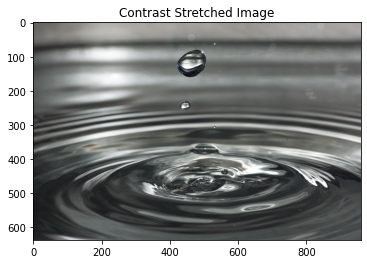

In [ ]:
''' Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by `stretching' the range of intensity values it contains 
to span a desired range of values, e.g. the the full range of pixel values that the image type concerned allows. It differs from the more sophisticated histogram equalization in that it can only apply a linear scaling function to the 
image pixel values. As a result the `enhancement' is less harsh. (Most implementations accept a graylevel image as input and produce another graylevel image as output.) '''

plt.title('Contrast Stretched Image')

# Read an image 

image = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/Water.jpg') 
plt.imshow(image)
plt.show()

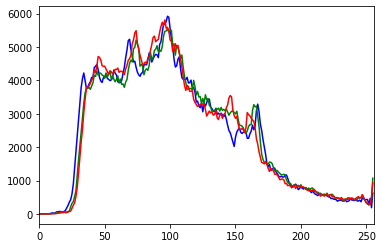

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show()

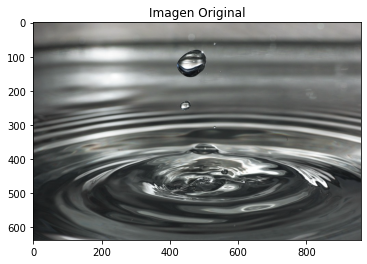

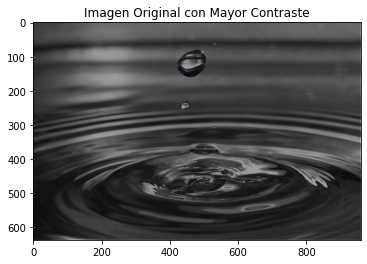

In [ ]:
# Apply contrast stretching method 

maxiI = 250
miniI = 3

maxoI = 155 
minoI = 0

stretched_image = image.copy()
# get height and width of the image 
height, width, _ = image.shape 
  
for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = stretched_image[i, j] 
          
        # scale each pixel by this formula
        '''
        pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
        
        '''
        
          
        # 1st index contains red pixel 
        pixel[0] = (pixel[0] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI  
          
        # 2nd index contains green pixel 
        pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # 3rd index contains blue pixel 
        pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # Store new values in the pixel 
        stretched_image[i, j] = pixel 
  

#original image
plt.title('Imagen Original')
plt.imshow(image) 
plt.show()

#stretched image
plt.title('Imagen Original con Mayor Contraste')
plt.imshow(stretched_image) 
plt.show() 

### **1.2 Bit Plain Slicing**

Las imagenes Digitalizadas estan representadas por pixeles los cuales en realidad son bits. Lo que se busca hacer con el bit plane Slicing es obtener planos de la imagen tomando los bits mas significativos en cada plano, entonces si tenemos una imagenes de 8 bits tendremos en realidad 8 planos.

Tomando como ejemplo la siguiente imagen ficticia de 3x3 bits
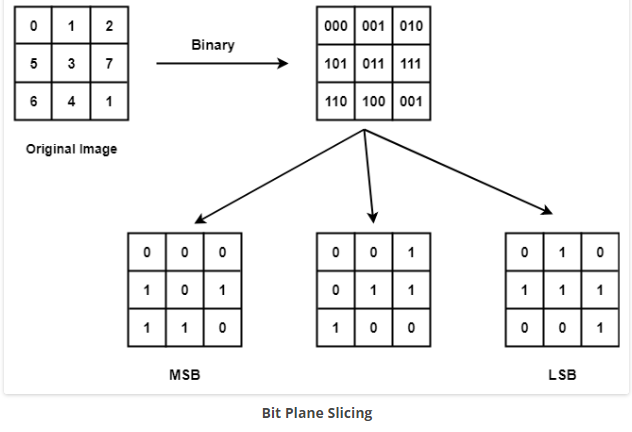

Los pasos son los siguientes:
1. Transformar de Decimal a binario cada pixel de la imagen
2. Obtener el LSB (Less Significative Bit) y remplazar ese bit en cada pixel.
3. Seguir con el siguiente plano y obtener el 2nd LSB y asi hasta llegar al ultimo plano.

In [ ]:
# Read the image in greyscale

img = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/kidney.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#img = 255 - img
imgcol=[]
n = np.arange(8)

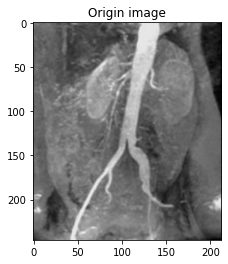

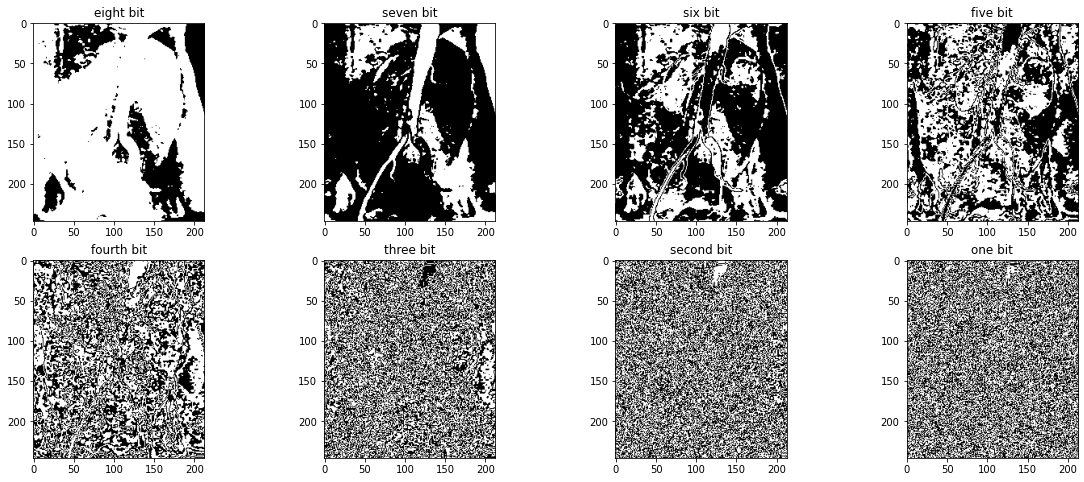

In [ ]:
# Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.

lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
         
for k in range(8):
  imgcol.append((np.array([int(i[k]) for i in lst],dtype = np.uint8) * pow(2,7-k)).reshape(img.shape[0],img.shape[1]))

titles = ['eight bit','seven bit','six bit','five bit','fourth bit','three bit','second bit','one bit']

plt.title("Origin image")
plt.imshow(img,cmap='gray') 
plt.show()

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,4,i+1), plt.imshow(imgcol[i],cmap='gray') # Add gray if not it will show in yellow and blue
  plt.title(titles[i])
plt.show()

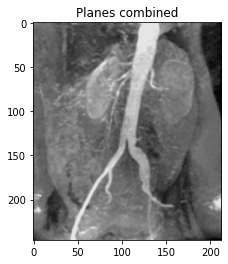

In [ ]:
# Combining planes

new_img= img.reshape(img.shape[0],img.shape[1])*0
for i in range(8):
  new_img = imgcol[i] + new_img
plt.title("Planes combined")
plt.imshow(new_img,cmap='gray') 
plt.show()

### **1.3 Intensity Level Slicing**

El corte de nivel de intensidad sirve para resaltar un rango específico en la imagen. En este procedimiento se selecciona el rango de niveles de grises que se quiere resaltar del resto de la imagen y se opta por uno de los dos métodos.

El primero lo que hace es resaltar el rango de niveles y pasarlos a blanco, mientras que el resto de los colores los pasa a negro. De esta forma se resaltan las regiones que caen en el rango seleccionado

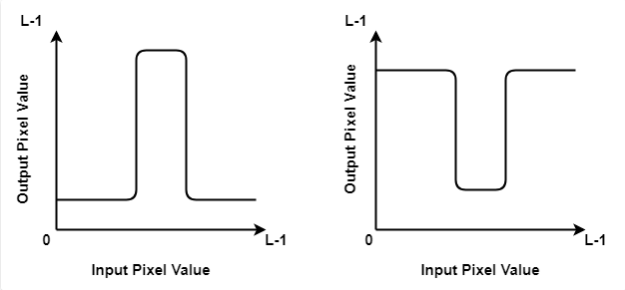

La segunda opción es abrillantar u oscurecer el rango de intensidades deseado y dejar el resto de la imagen sin cambios.

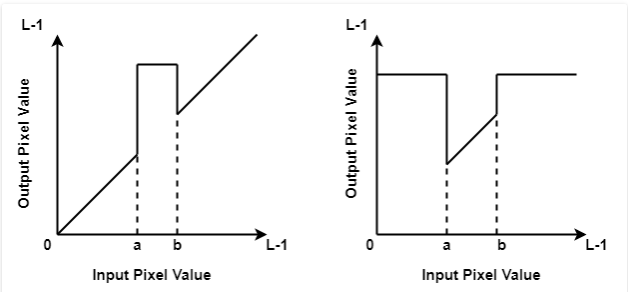

A continuación veremos un ejemplo del primer procedimiento

In [ ]:
# Load the image

img = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/mountain.jpg',0)

In [ ]:
#  Find width and height of image

row, column = img.shape

In [ ]:
#  Create an zeros array to store the sliced image

img1 = np.zeros((row,column),dtype = 'uint8')

In [ ]:
#  Specify the min and max range

min_range = 100
max_range = 160

In [ ]:
#  Loop over the input image and if pixel value lies in desired range set it to 255 otherwise set it to 0.

for i in range(row):
  for j in range(column):
    if img[i,j]>min_range and img[i,j]<max_range: img1[i,j] = 255
    else: img1[i,j] = 0

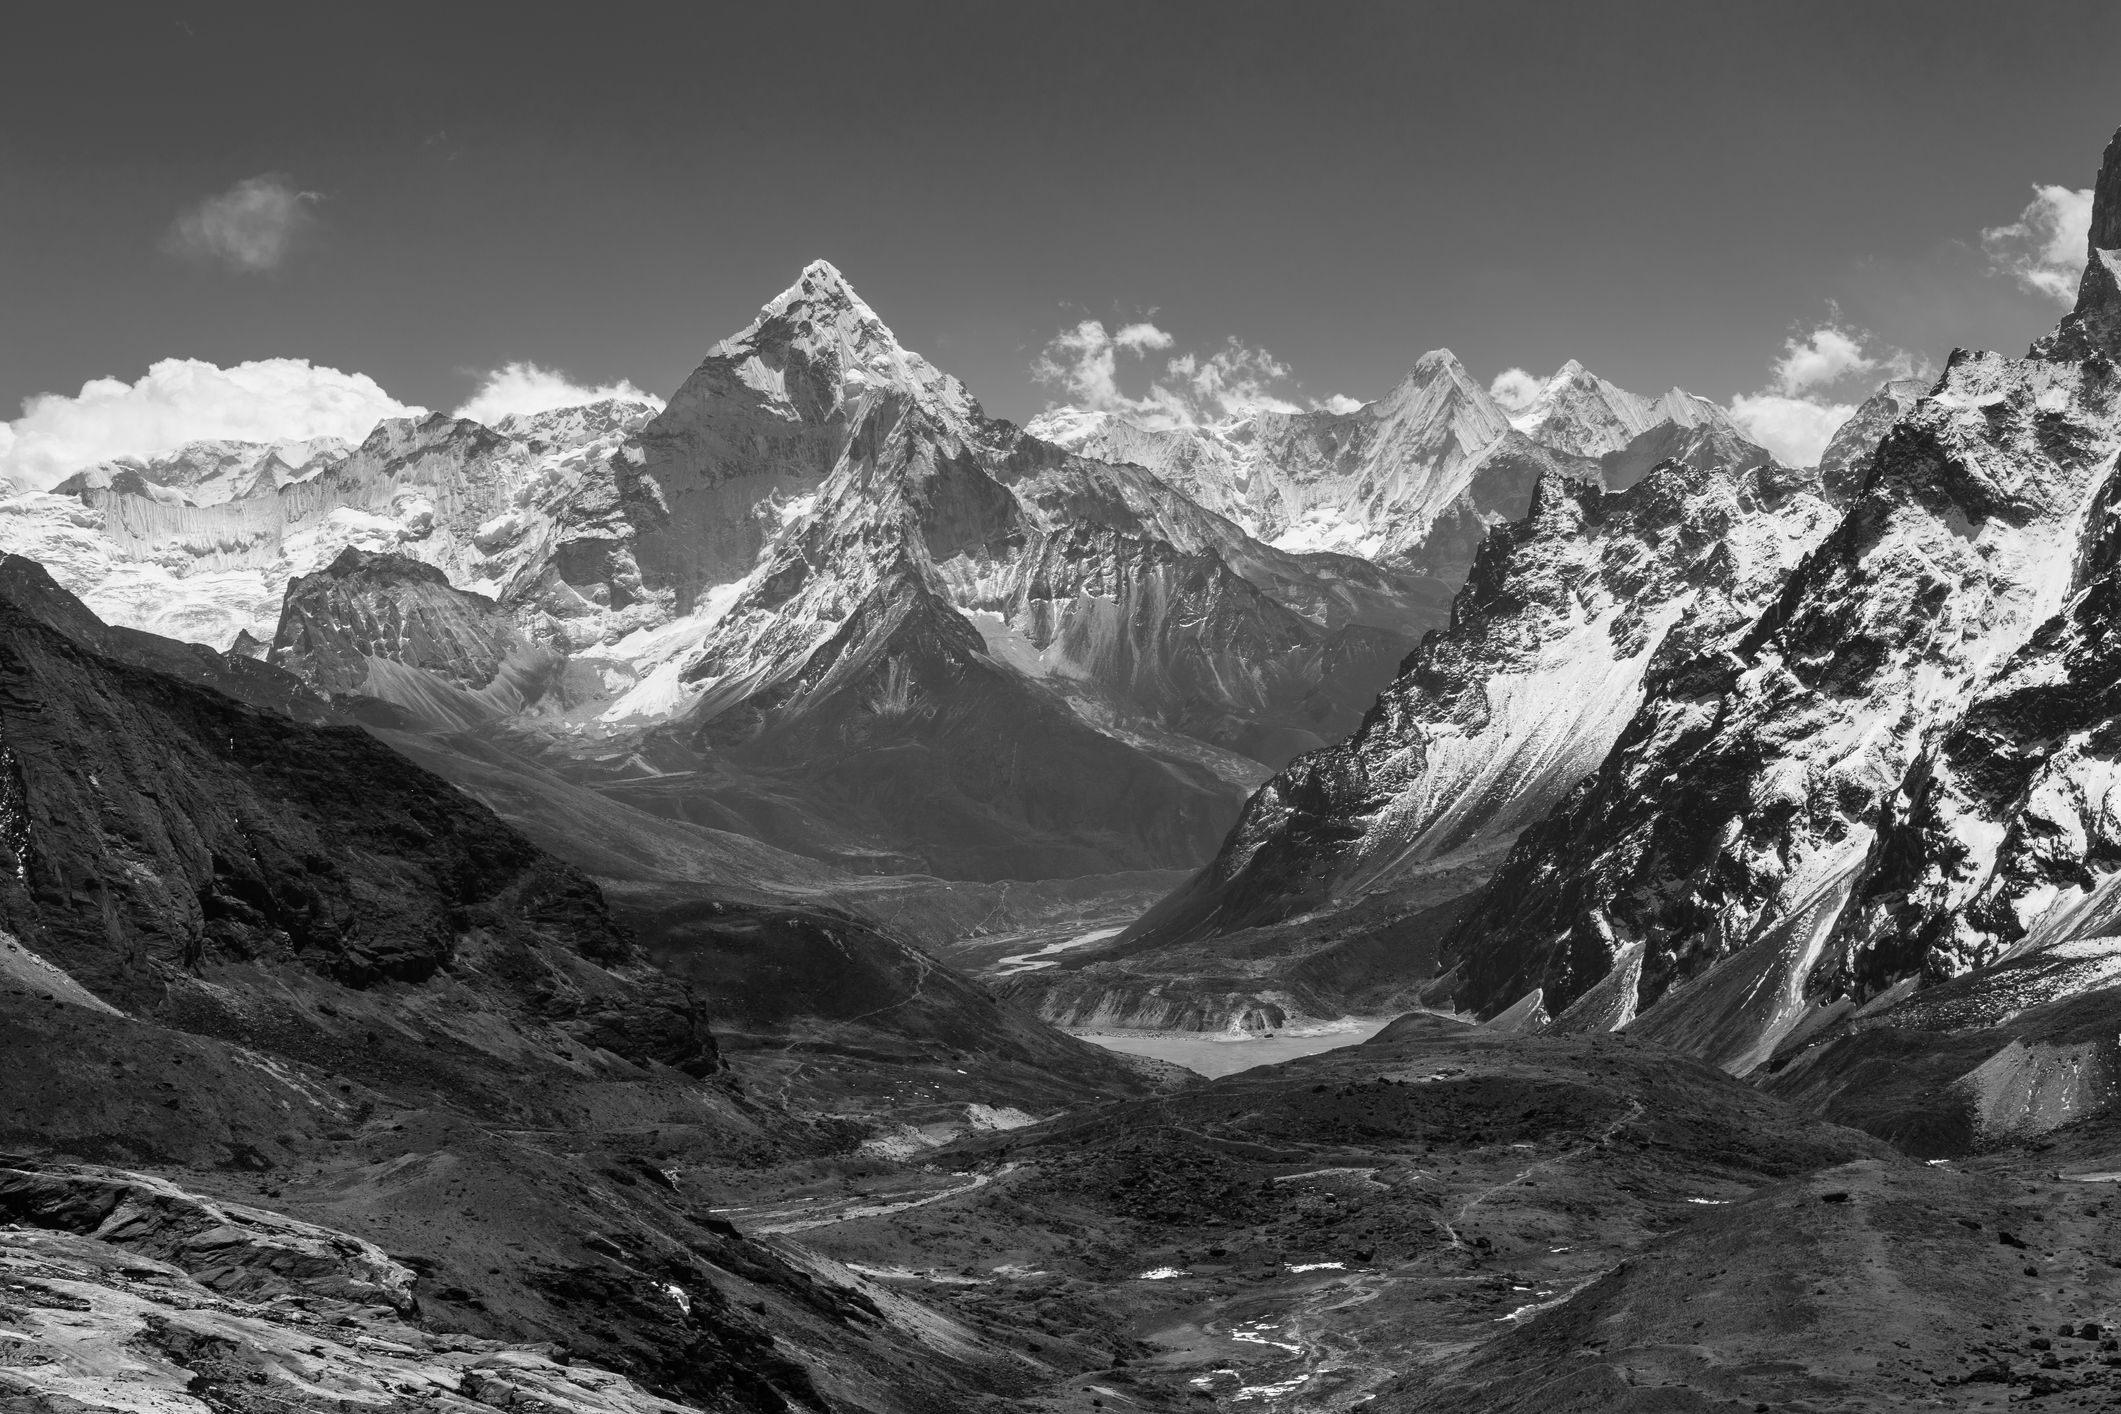

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

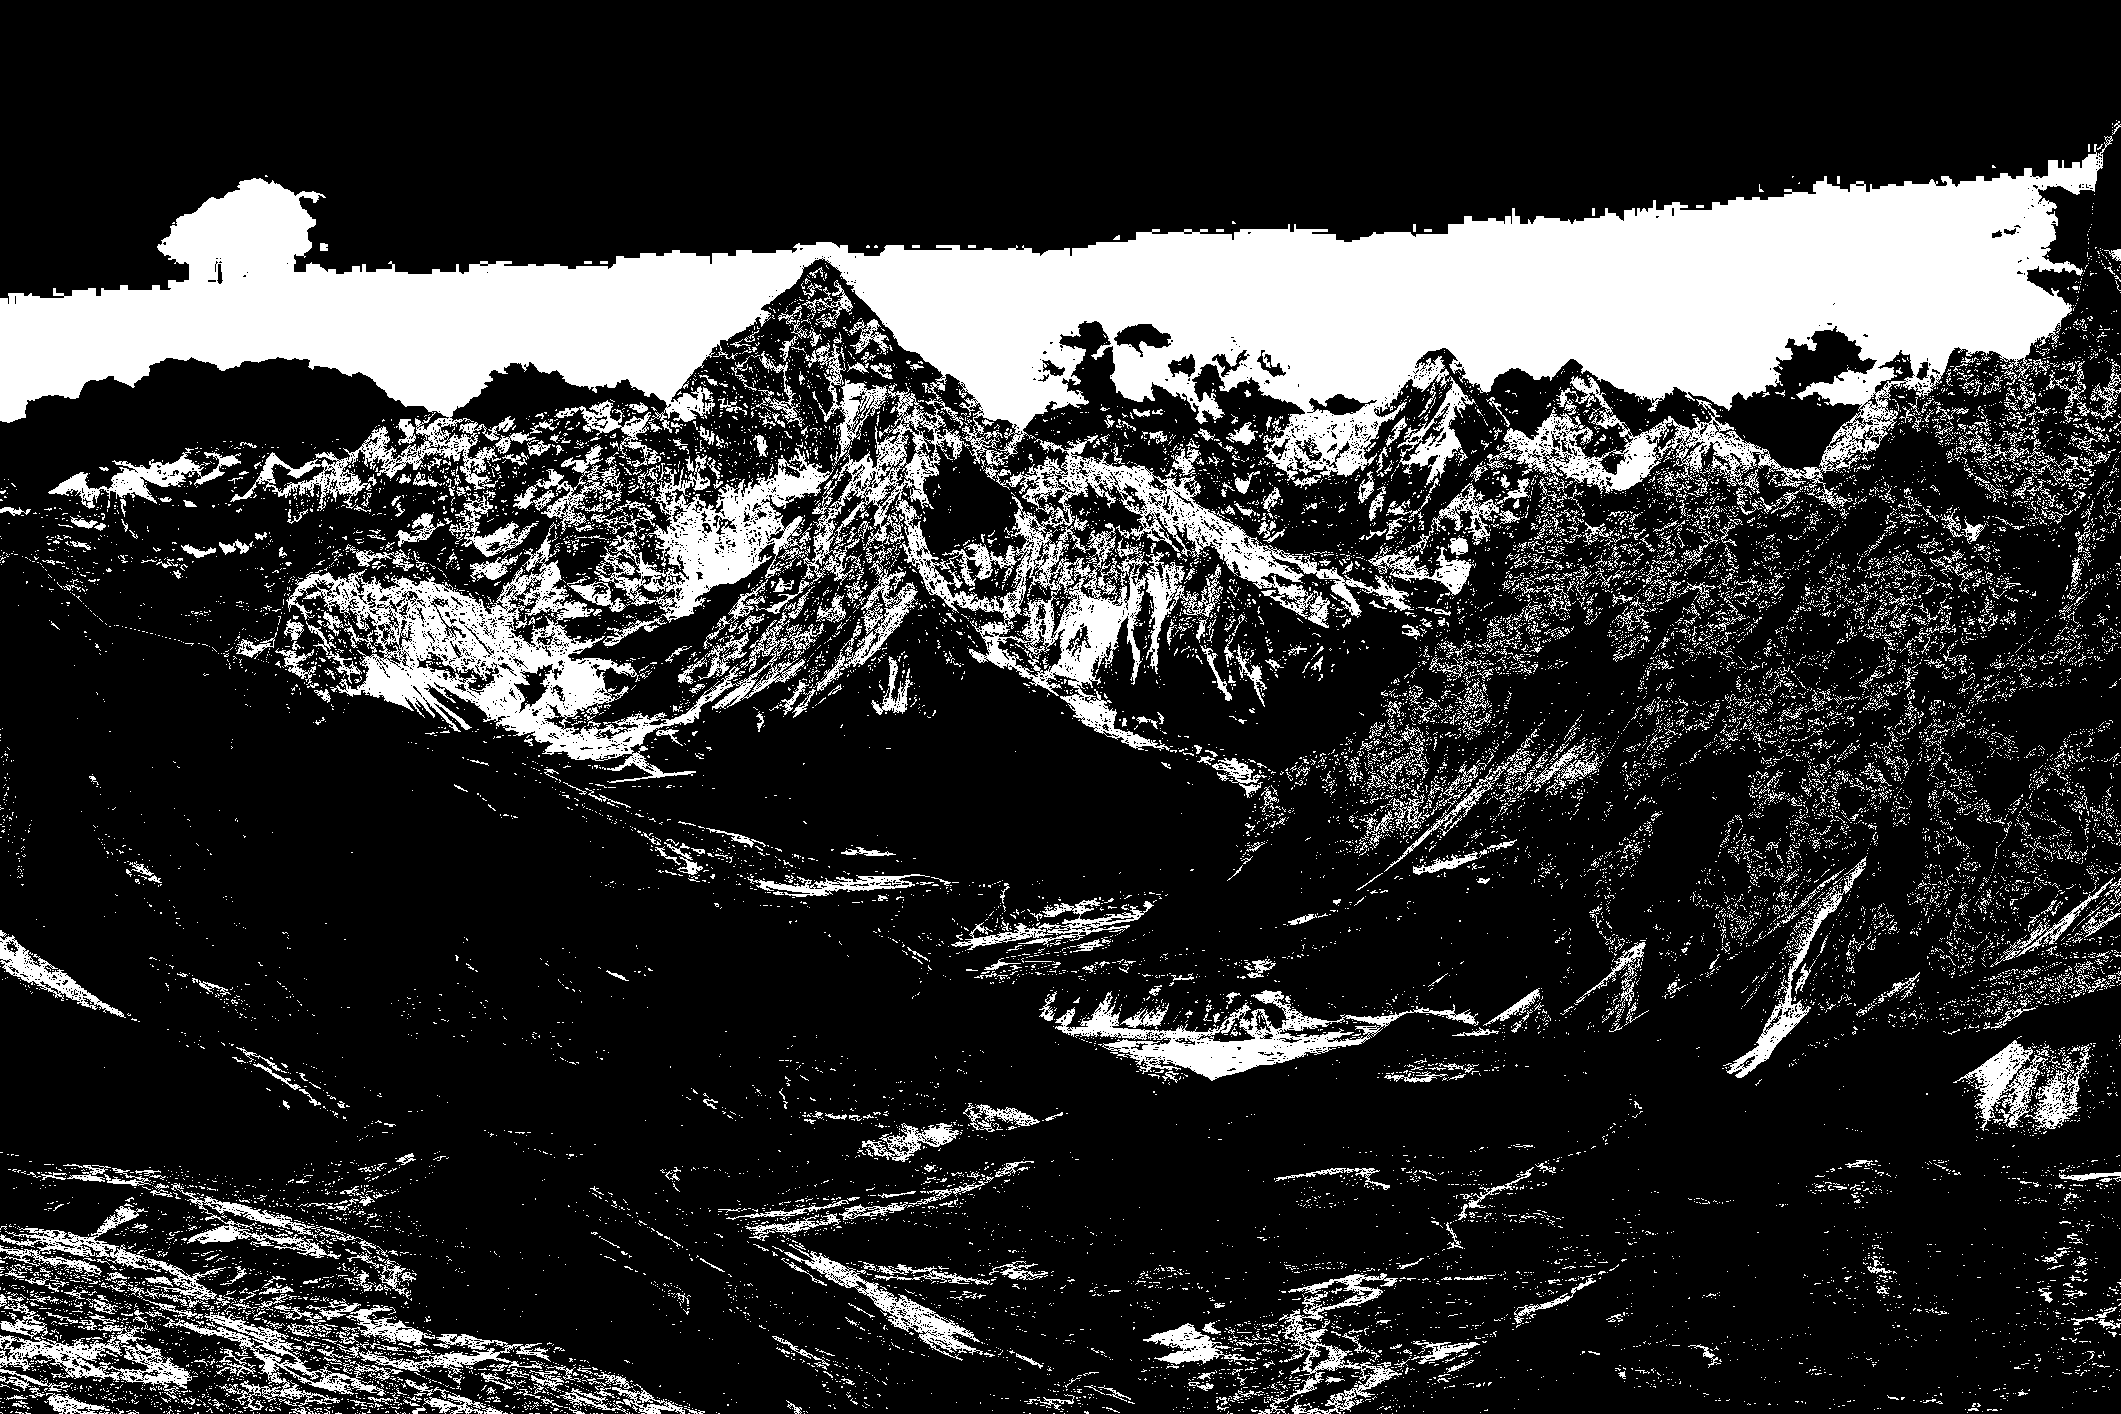

-1

In [ ]:
#  Display the image

from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2.waitKey(0)

## **2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.**

Es importante consdierar que el negativo de una imagen es una versión invertida de la imagen original en términos de tonos de color. Se logra cambiando cada tono de color de la imagen original con su tono opuesto. Por ejemplo, si un pixel en la imagen original tiene un tono de gris de 128 (que es medio gris), su tono opuesto sería 128 (255-128) en el negativo de la imagen.

Adicionalmente, en el negativo de una imagen los tonos claros se vuelven oscuros y los tonos oscuros se vuelven claros. Es una técnica común en el procesamiento de imágenes que frecuentemente se usa para destacar detalles o para crear efectos artísticos.


In [ ]:
#Importamos librerías
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import requests

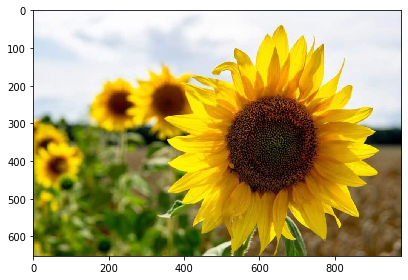

In [ ]:
# URL de la imagen
url = 'https://educacion30.b-cdn.net/wp-content/uploads/2019/02/girasoles-978x652.jpg'

# Cargar imagen en memoria
img = io.imread(url)

# Mostrar imagen
io.imshow(img)
io.show()

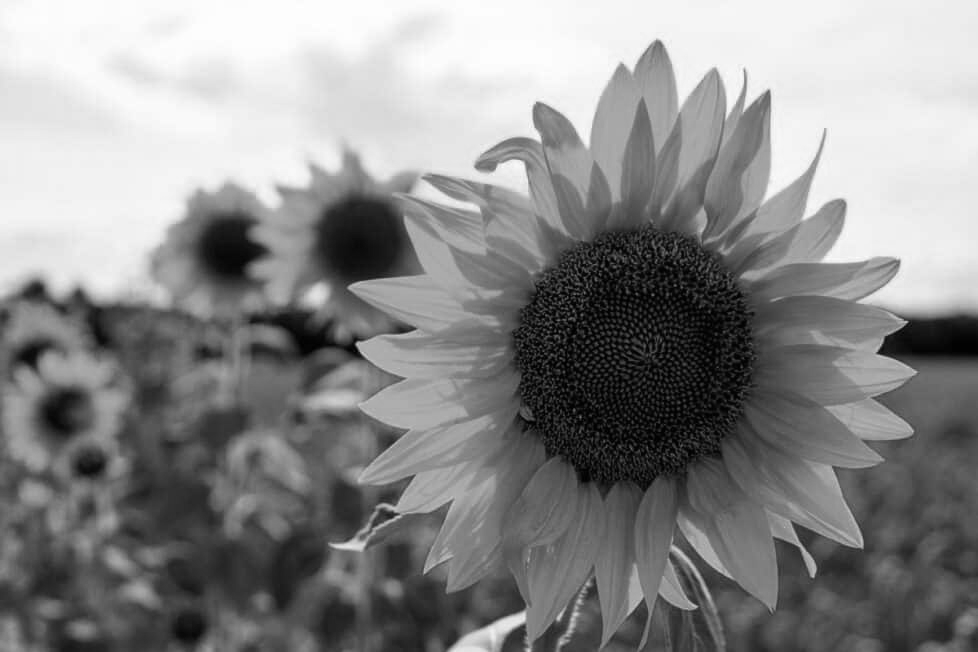

In [ ]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

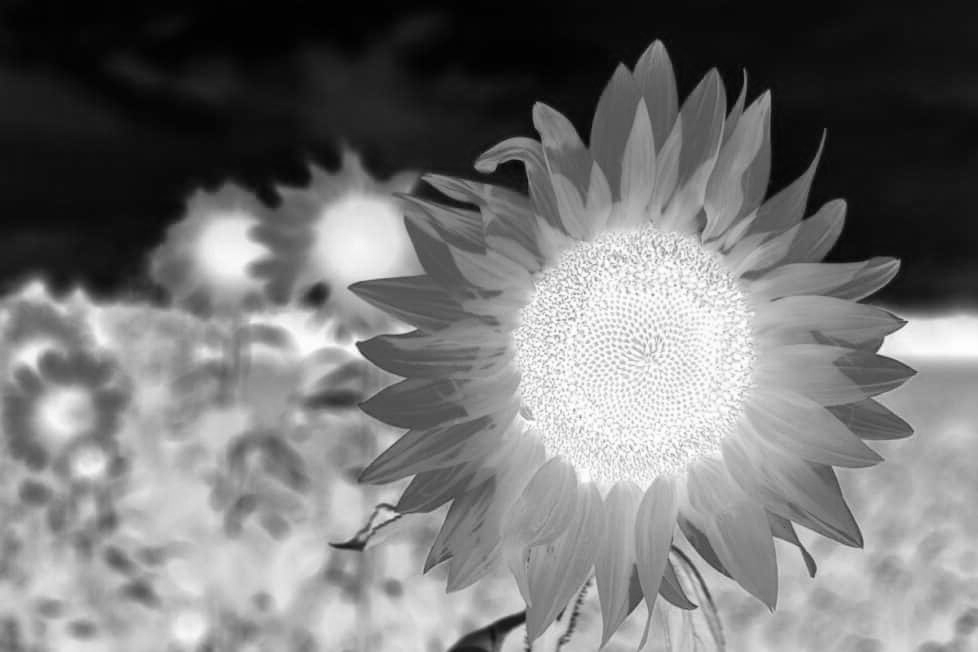

In [ ]:
im2 = 255 - gray_image
cv2_imshow(im2)

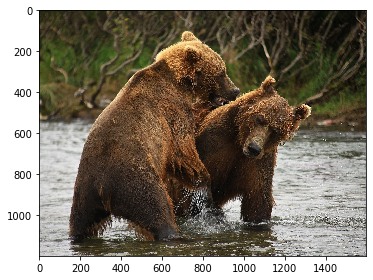

In [ ]:
#https://images.freeimages.com/images/large-previews/d41/bear-combat-2-1332988.jpg

# URL de la imagen
url = 'https://images.freeimages.com/images/large-previews/d41/bear-combat-2-1332988.jpg'

# Cargar imagen en memoria
img = io.imread(url)

# Mostrar imagen
io.imshow(img)
io.show()

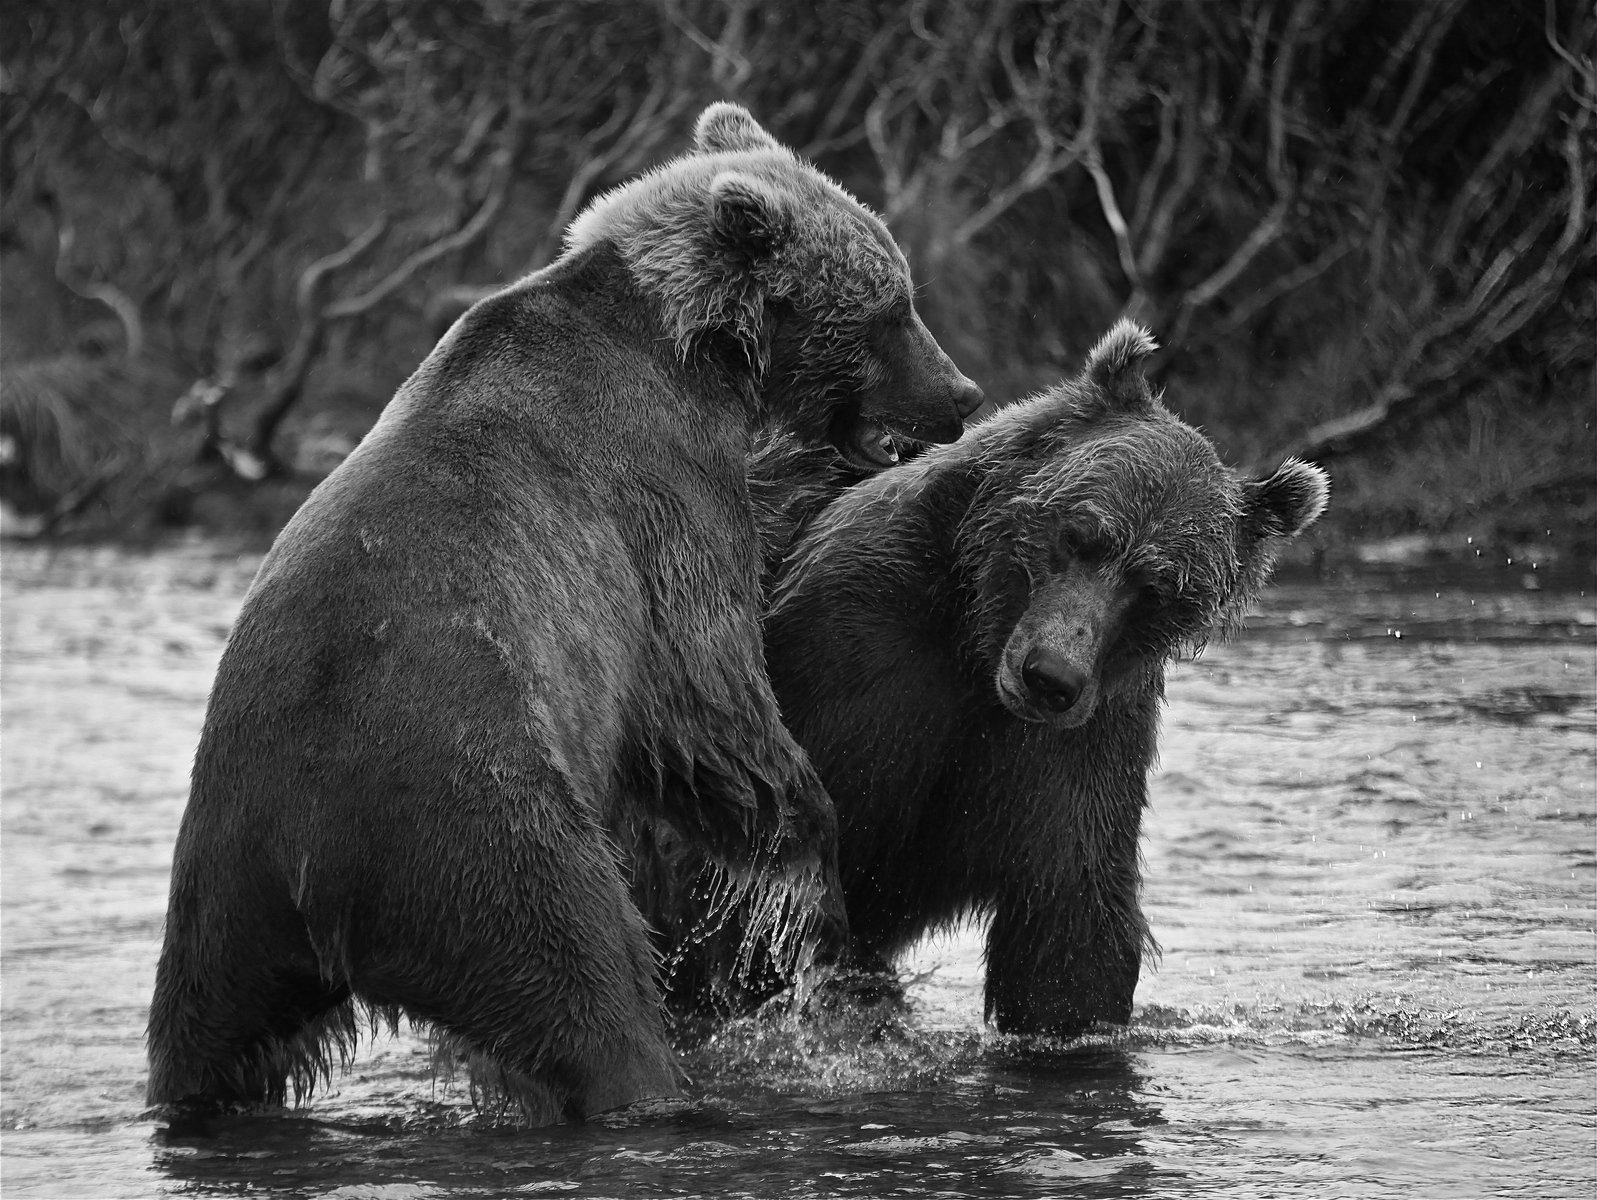

In [ ]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

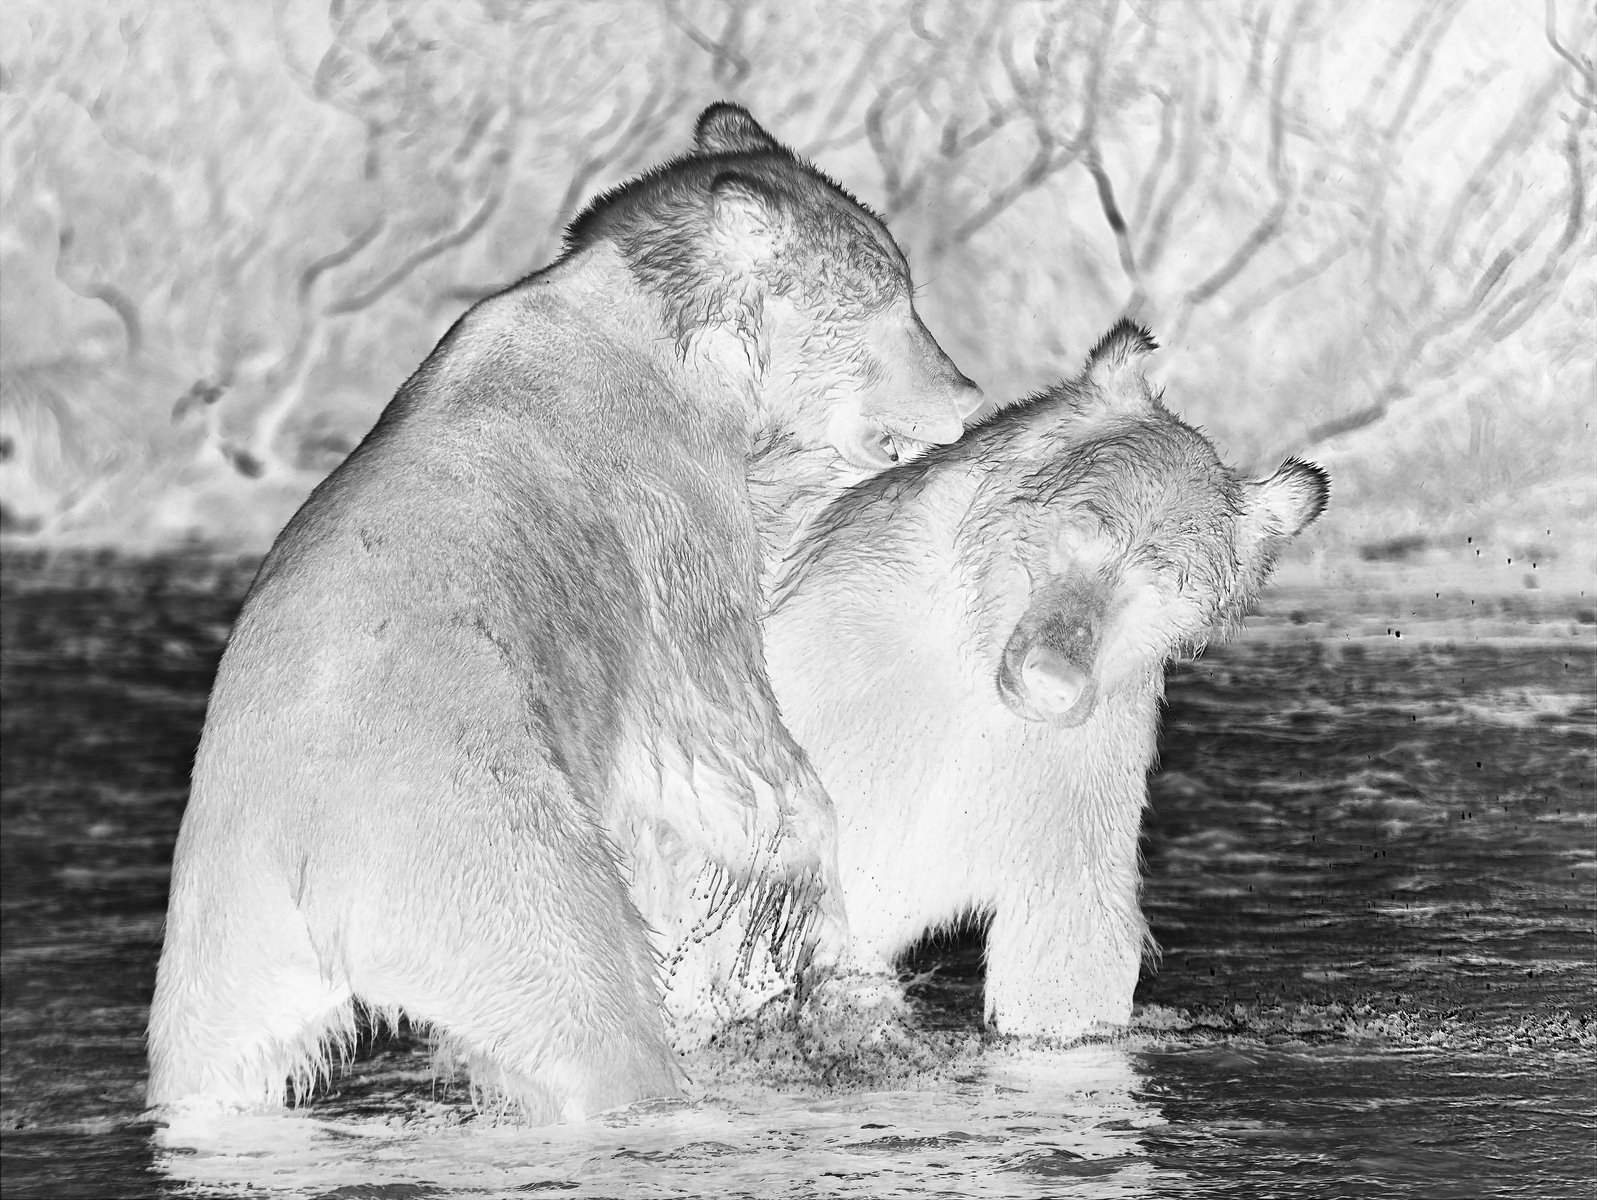

In [ ]:
im2 = 255 - gray_image
cv2_imshow(im2)

## **3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.**

La correción gamma se usa generalmente en sistemas de TV y monitores para reproducir las imágenes tomadas por las cámaras. En el procesamiento de imágenes, 

También se puede utilizar para ajustar el contraste de la imagen y reducir la iluminación desigual y las sombras parciales de la imagen.

Fórmula de corrección gamma:
f(x)=xγ  f( x ) =xγ

Es decir, la salida es la función de potencia de la entrada y el exponente es γ  γ

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

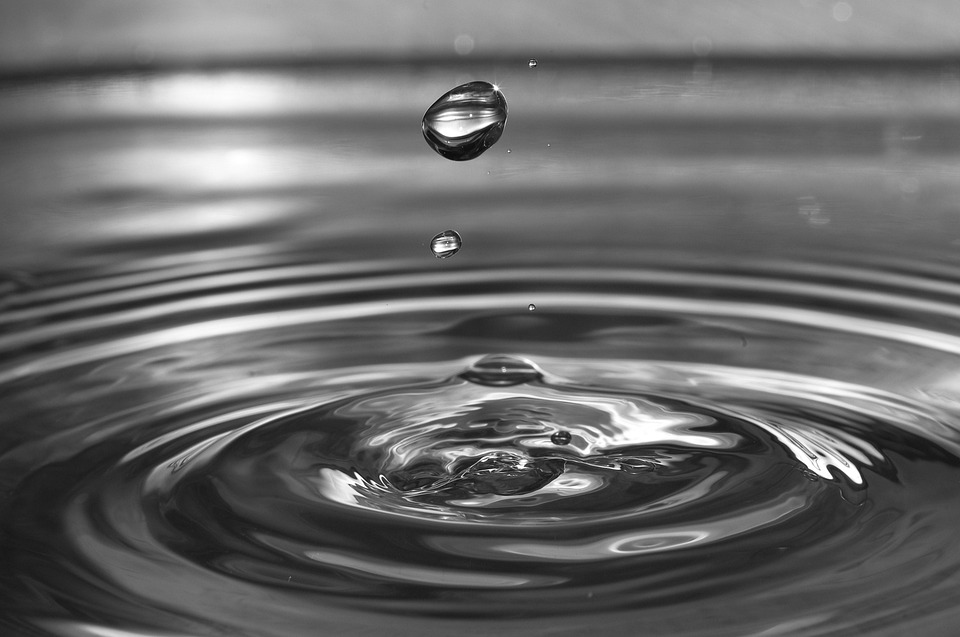

In [ ]:
img = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/Water.jpg',0)
cv2_imshow(img)

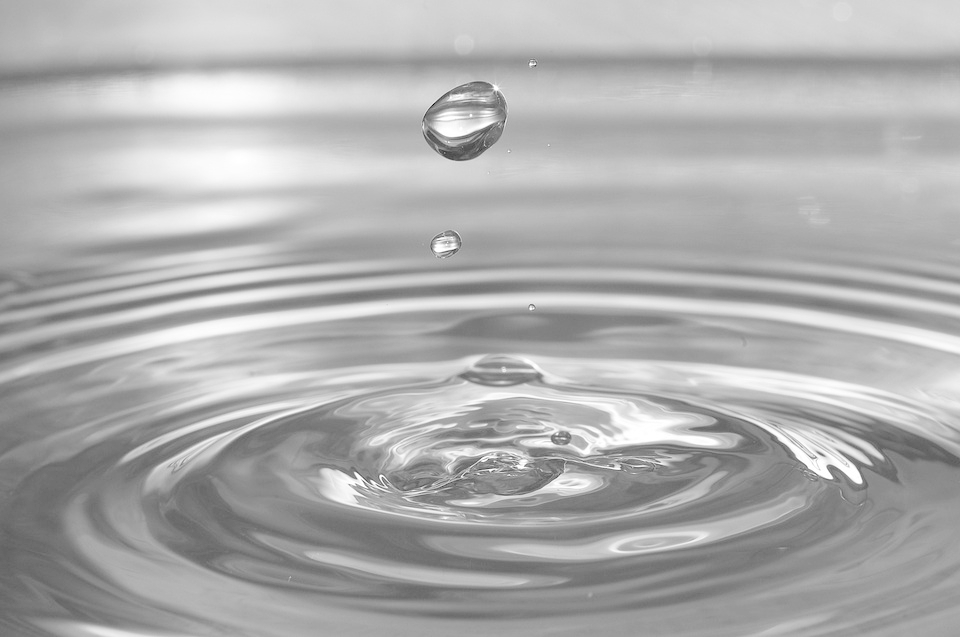

In [ ]:
lookUpTable  =  np .empty(( 1 , 256 ), np . uint8 )
for  i  in range ( 256 ):
    lookUpTable  [ 0 , i ] =  np . clip ( pow ( i  /  255.0 , 0.4) *  255.0 , 0 , 255 )

res  =  cv2 . LUT ( img , lookUpTable  )

cv2_imshow (res)

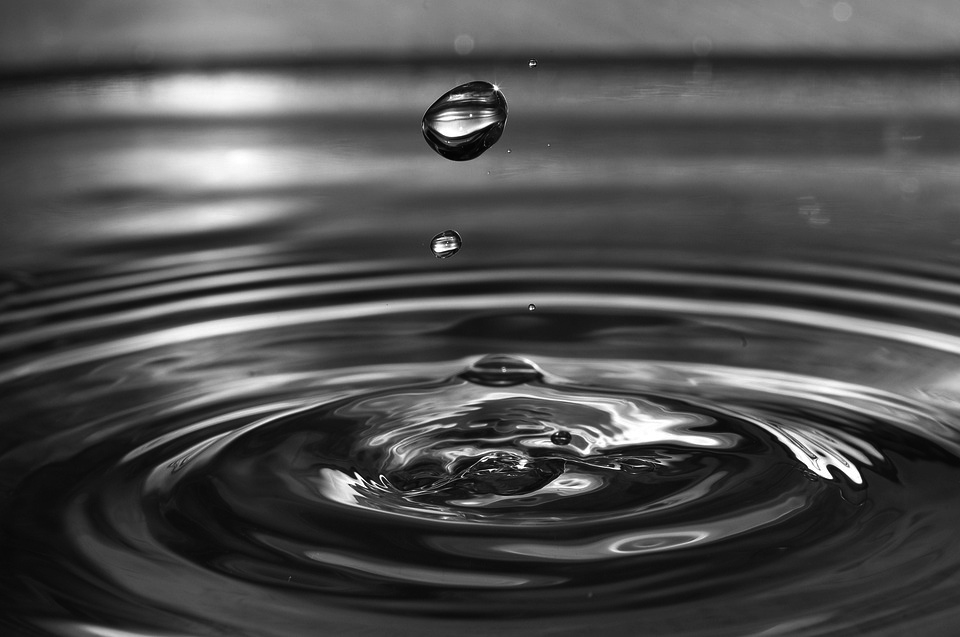

In [ ]:
lookUpTable  =  np .empty(( 1 , 256 ), np . uint8 )
for  i  in range ( 256 ):
    lookUpTable  [ 0 , i ] =  np . clip ( pow ( i  /  255.0 , 1.4) *  255.0 , 0 , 255 )

res  =  cv2 . LUT ( img , lookUpTable  )

cv2_imshow (res)

## **4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.**

La sustracción de imágenes o sustracción de píxeles es un proceso mediante el cual el valor numérico digital de un píxel o la imagen completa se resta de otra imagen. Esto se hace principalmente por una de dos razones: nivelar secciones irregulares de una imagen, como la mitad de una imagen que tiene una sombra, o detectar cambios entre dos imágenes. [1] Esta detección de cambios se puede usar para saber si algo en la imagen se movió. Esto se usa comúnmente en campos como la astrofotografía para ayudar con la búsqueda computarizada de asteroides u objetos del cinturón de Kuiper.en el que el objetivo se está moviendo y estaría en un lugar en una imagen, y en otro de una imagen una hora después y donde mediante esta técnica haría desaparecer las estrellas fijas del fondo dejando solo el objetivo.


In [ ]:
# Definir las imágenes a comparar

image1 = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/Pirata 1.jpeg', 0)
image2 = cv2.imread('/content/drive/Shareddrives/Vision/TAREA 1/Data Imagenes/Pirata 2.jpeg', 0)


In [ ]:
import cv2

#img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',image2.shape)

#scale_percent = 60 # percent of original size
#width = int(img.shape[1] * scale_percent / 100)
#height = int(img.shape[0] * scale_percent / 100)
dim = (image1.shape[1], image1.shape[0])
 
# resize image
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA)

Original Dimensions :  (875, 879)


In [ ]:
# Definir la sustracción con las imágenes definidas

sub = cv2.subtract(image1, image2)

print('image1[0,0]= ',image1[0,0])
print('image2[0,0]= ',image2[0,0])
print('sub[0,0]= ',sub[0,0])

image1[0,0]=  255
image2[0,0]=  252
sub[0,0]=  3


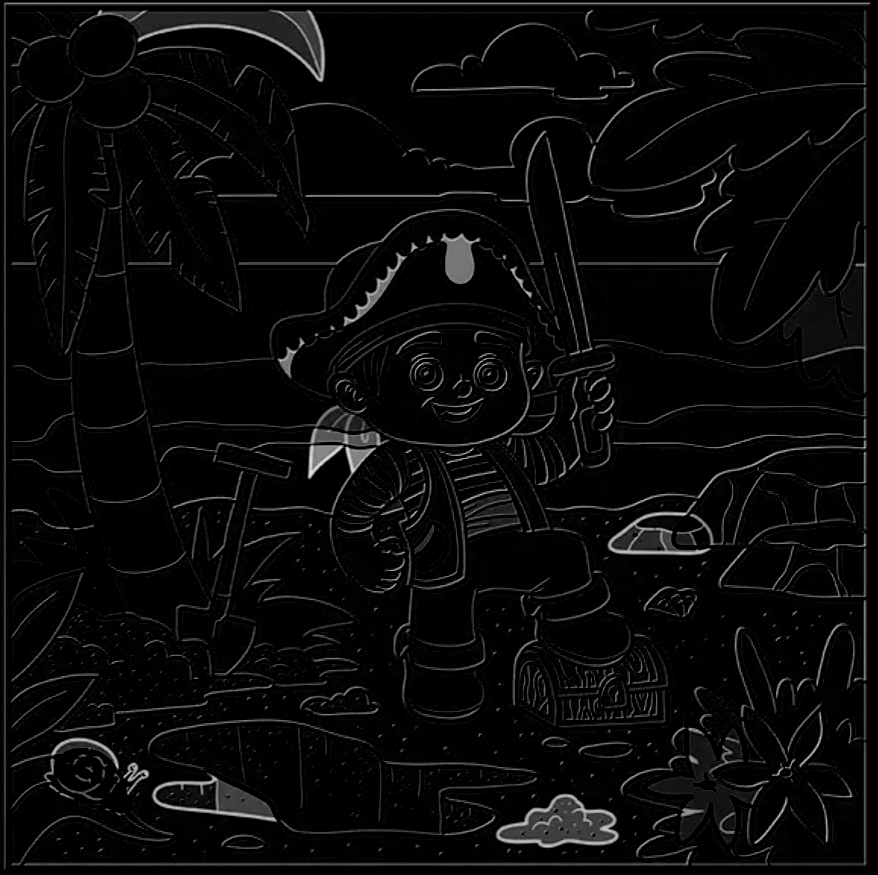

-1

In [ ]:
# Mostrar la comparación (sustracción de ambas imágenes)

sub = cv2.subtract(image1, image2)

from google.colab.patches import cv2_imshow

cv2_imshow(sub)
cv2.waitKey(0)

##Referencias
Kang & Atul. (2019). Intensity-level slicing.Obtenido de TheAILerner el 20/01/2023 de: https://theailearner.com/2019/01/29/intensity-level-slicing/#:~:text=Intensity%20level%20slicing%20means%20highlighting,between%20say%2080%20to%20150.

Gonzalez, R. & Woods, R. (2018). Digital Image Processing. 4° Edition. Pearson


Abder-Rahman, Ali. (2018). Procesamiento de imágenes-corrección gamma / Python. Recuperado de: https://programmerclick.com/article/75561056796/

geeksforgeeks. (2023).How to subtract two images using Python-OpenCV ?. Recuperado de: https://www.geeksforgeeks.org/how-to-subtract-two-images-using-python-opencv/

Valdebenito,M & Jensen, H. (2010).RELIABILITY SENSITIVITY OF LINEAR DYNAMICAL SYSTEMS
SUBJECT TO GAUSSIAN EXCITATION, *Mecanica Computacional*. Recuperado de: https://amcaonline.org.ar › ojs › article › download


Kang & Atul. (2019). Image Negatives or inverting images using OpenCV. Obternido de TheAILearner. Recuperado de:https://theailearner.com/2019/01/01/image-negatives/

A C Johnsy, (2018).'Frost Filter Matlab code',http://www.imageeprocessing.com/2018/06/frost-filter.htm

Kang & Atul. (2019). Bit-plane Slicing. Obternido de TheAILearner. Recuperado de:https://theailearner.com/2019/01/25/bit-plane-slicing/#:~:text=For%20an%208%2Dbit%20image,changes%20from%20255%20to%20127.